### Cell 1: Imports and Dataset Loading

We start by importing the necessary libraries, such as pandas for data handling and numpy for numerical operations.
We use the !wget command to download the dataset from a URL and save it as "cc_approvals.data" in the current Colab environment.
Next, we load the dataset into a Pandas DataFrame, providing custom column names to make it more understandable.

In [ ]:
import pandas as pd
import numpy as np

# Download the dataset from a URL and save it as cc_approvals.data
!wget -O cc_approvals.data https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

# Load the dataset
df = pd.read_csv('cc_approvals.data', header=None)
cols = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
        'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen',
        'ZipCode', 'Income', 'ApprovalStatus']
df.columns = cols


--2023-10-31 19:50:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘cc_approvals.data’

cc_approvals.data       [ <=>                ]  31.46K  --.-KB/s    in 0.06s   

2023-10-31 19:50:25 (496 KB/s) - ‘cc_approvals.data’ saved [32218]



In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Cell 2: Data Preprocessing

In this cell, we perform data preprocessing tasks.
We replace any question marks ('?') in the dataset with NaN values using the replace method.
Rows with missing values (NaN) are then dropped from the dataset to ensure data completeness.
We convert specific columns to appropriate data types for analysis. In this case, we convert 'Age' to float, 'ZipCode' to integer, and 'ApprovalStatus' to binary values (0 or 1) to prepare the data for machine learning.


In [ ]:
# Replace '?' with NaN and drop rows with missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert columns to appropriate data types
df['Age'] = df['Age'].astype(float)
df['ZipCode'] = df['ZipCode'].astype(int)
df['ApprovalStatus'] = df['ApprovalStatus'].map({'+': 1, '-': 0})


### Cell 3: Handling Outliers

In this cell, we define a function called handle_outliers to address outliers in the dataset.
The function takes as input the DataFrame (df), the column name to be examined (column), and the target variable ('0' or '1') for which outliers will be handled.
Outliers are identified based on the Interquartile Range (IQR) and a 1.5*IQR threshold. Rows with outliers for the specified column and target are removed from the DataFrame.


In [ ]:
def handle_outliers(df, column, target):
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = ((df[column] > upper_fence) | (df[column] < lower_fence))
    df = df[~(outliers & (df['ApprovalStatus'] == target))]
    return df

# Handle outliers for 'Age' based on ApprovalStatus
df = handle_outliers(df, 'Age', 0)
df = handle_outliers(df, 'Age', 1)


In [ ]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0


### Cell 4: Preprocess Data and One-Hot Encoding

Here, we perform additional data preprocessing and one-hot encoding.
We apply the handle_outliers function to remove outliers for 'Age' in rows where 'ApprovalStatus' is '0' and '1', separately.
After handling outliers, we perform one-hot encoding on the dataset using the pd.get_dummies function. This converts categorical variables into binary (0 or 1) variables, making them suitable for machine learning.


In [ ]:
# Preprocess the data and perform one-hot encoding
df = pd.get_dummies(df)
df.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,ApprovalStatus,Gender_a,Gender_b,Married_l,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,202,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43,560,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280,824,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100,3,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1


### Data Exploration:

In this cell, we will perform some initial data exploration to understand the dataset better. Specifically, we will look at the distribution of target classes and visualize the feature distributions.

Class Distribution:
 0    351
1    285
Name: ApprovalStatus, dtype: int64


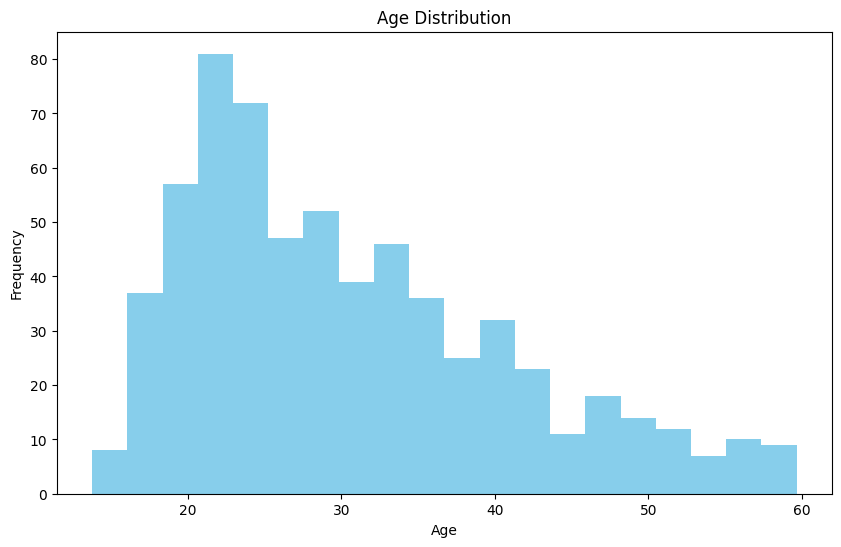

In [ ]:
import matplotlib.pyplot as plt

# Data Exploration
# Class Distribution
class_distribution = df['ApprovalStatus'].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize the distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Class Distribution:
 0    351
1    285
Name: ApprovalStatus, dtype: int64


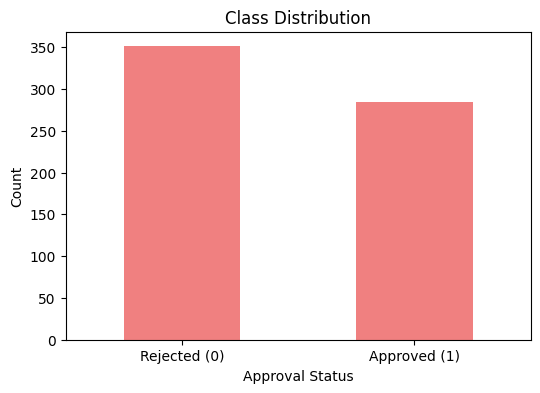

In [ ]:
import matplotlib.pyplot as plt

# Data Exploration
# Class Distribution
class_distribution = df['ApprovalStatus'].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='lightcoral')
plt.title("Class Distribution")
plt.xlabel("Approval Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["Rejected (0)", "Approved (1)"], rotation=0)
plt.show()


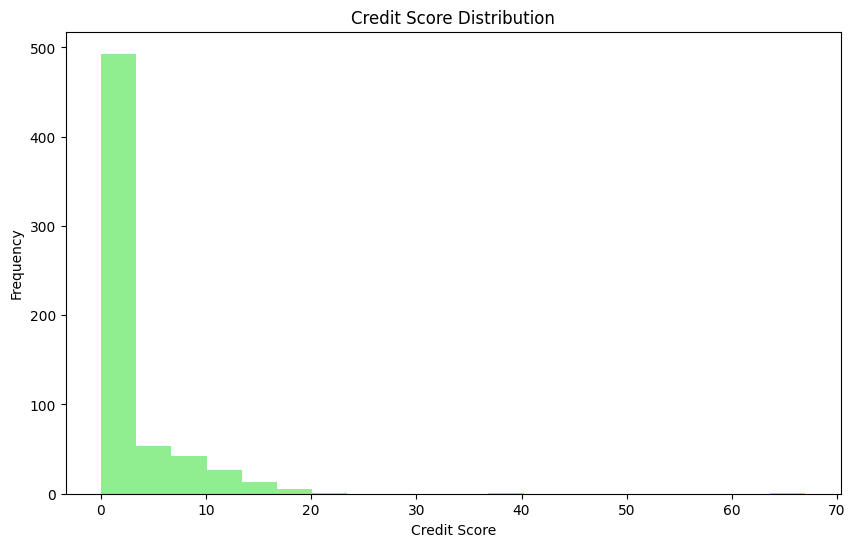

In [ ]:
import matplotlib.pyplot as plt

# Data Exploration
# Visualize the distribution of Credit Score
plt.figure(figsize=(10, 6))
plt.hist(df['CreditScore'], bins=20, color='lightgreen')
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


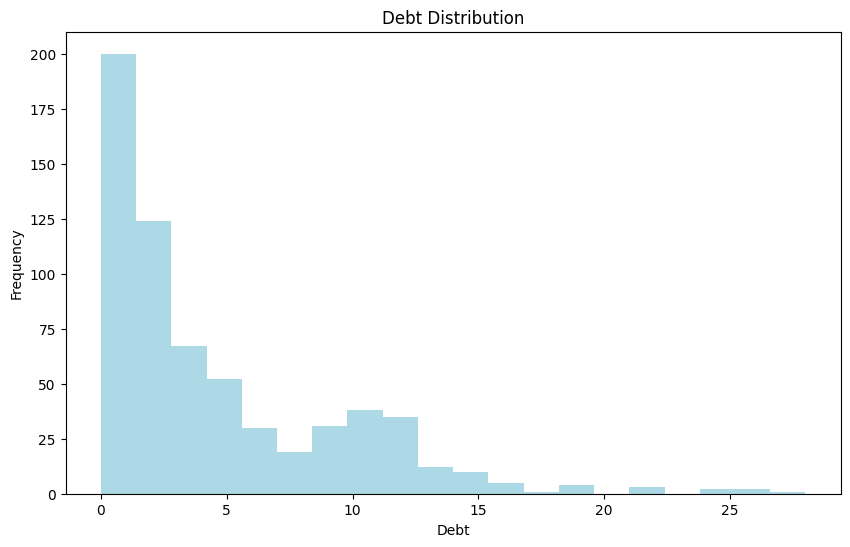

In [ ]:
import matplotlib.pyplot as plt

# Data Exploration
# Visualize the distribution of Debt
plt.figure(figsize=(10, 6))
plt.hist(df['Debt'], bins=20, color='lightblue')
plt.title("Debt Distribution")
plt.xlabel("Debt")
plt.ylabel("Frequency")
plt.show()


### Split the Data and Import Classification Models

Here, we split the dataset into training and testing sets and import the classification models.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (Y)
X = df.drop('ApprovalStatus', axis='columns')
Y = df['ApprovalStatus']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

# Import necessary classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


### Decision Tree Classifier

This cell performs Decision Tree classification, including hyperparameter tuning using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier
model3 = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [5, 7, 9, 10, 11],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model3, param_grid, cv=5)

# Fit the data into the grid search object
grid_search.fit(X, Y)

# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

model4 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, min_samples_split=5)
model4.fit(xtrain, ytrain)

print("Train Data Accuracy =", model4.score(xtrain, ytrain))
print("Test Data Accuracy =", model4.score(xtest, ytest))

print("Train Data Classification Report:\n", classification_report(ytrain, model4.predict(xtrain)))
print("Test Data Classification Report:\n", classification_report(ytest, model4.predict(xtest)))


Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
Train Data Accuracy = 0.8661417322834646
Test Data Accuracy = 0.8515625
Train Data Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87       283
           1       0.79      0.94      0.86       225

    accuracy                           0.87       508
   macro avg       0.87      0.87      0.87       508
weighted avg       0.88      0.87      0.87       508

Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        68
           1       0.80      0.92      0.85        60

    accuracy                           0.85       128
   macro avg       0.86      0.86      0.85       128
weighted avg       0.86      0.85      0.85       128



**Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}**

This line provides the best hyperparameters selected for the Decision Tree Classifier using GridSearchCV. The best configuration includes a maximum depth of 1, a minimum number of samples required to be at a leaf node (min_samples_leaf) set to 1, and a minimum number of samples required to split an internal node (min_samples_split) set to 5.

**Train Data Accuracy = 0.86614 and Test Data Accuracy = 0.85156**

These lines show the accuracy of the Decision Tree Classifier on the training and test datasets. The model achieves an accuracy of approximately 86.62% on the training data and 85.16% on the test data.

**Train Data Classification Report:**

This section provides a detailed classification report for the model's performance on the training dataset:

* **Precision:** Precision measures the accuracy of positive predictions. In this case, for class 0, the precision is 95%, meaning that 95% of the predictions for class 0 were correct. For class 1, the precision is 78%, indicating that 78% of the predictions for class 1 were correct.

* **Recall:** Recall measures the model's ability to identify all relevant instances. For class 0, the recall is 81%, indicating that 81% of the actual instances of class 0 were correctly identified. For class 1, the recall is 94%, meaning that 94% of the actual instances of class 1 were correctly identified.

* **F1-score:** The F1-score is the harmonic mean of precision and recall. For class 0, the F1-score is 87%, and for class 1, it is 86%.

* **Support:** The support represents the number of actual occurrences of each class in the dataset.

**Test Data Classification Report:**

This section provides a similar classification report for the model's performance on the test dataset. The same metrics (precision, recall, F1-score, and support) are calculated for both classes (0 and 1).

* The model achieved an accuracy of approximately 85% on the test data, indicating that it performs well on unseen data.

* The precision, recall, and F1-scores show that the model maintains a good balance between identifying both classes (0 and 1) accurately.

* The macro avg and weighted avg provide aggregate metrics for overall model performance. In this case, the model performs well in distinguishing between class 0 and class 1.

### Random Forest Classifier

This cell performs Random Forest classification, including hyperparameter tuning using GridSearchCV.

In [ ]:
# Random Forest Classifier
model5 = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 20, 40, 80],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [5, 7, 9, 10, 11],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model5, param_grid, cv=5)

# Fit the data into the grid search object
grid_search.fit(X, Y)

# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

model6 = RandomForestClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=9, n_estimators=80)
model6.fit(xtrain, ytrain)

print("Train Data Accuracy =", model6.score(xtrain, ytrain))
print("Test Data Accuracy =", model6.score(xtest, ytest))

print("Train Data Classification Report:\n", classification_report(ytrain, model6.predict(xtrain)))
print("Test Data Classification Report:\n", classification_report(ytest, model6.predict(xtest)))


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 20}
Train Data Accuracy = 0.8759842519685039
Test Data Accuracy = 0.8359375
Train Data Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       283
           1       0.91      0.80      0.85       225

    accuracy                           0.88       508
   macro avg       0.88      0.87      0.87       508
weighted avg       0.88      0.88      0.87       508

Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        68
           1       0.91      0.72      0.80        60

    accuracy                           0.84       128
   macro avg       0.85      0.83      0.83       128
weighted avg       0.85      0.84      0.83       128



**Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 20}**

These lines provide information about the best hyperparameters selected for the Random Forest Classifier using GridSearchCV. The best configuration includes a maximum depth of 3, a minimum number of samples required to be at a leaf node (min_samples_leaf) set to 3, a minimum number of samples required to split an internal node (min_samples_split) set to 10, and the number of trees in the forest (n_estimators) set to 20.

**Train Data Accuracy = 0.87598 and Test Data Accuracy = 0.83594**

These lines show the accuracy of the Random Forest Classifier on the training and test datasets. The model achieves an accuracy of approximately 87.60% on the training data and 83.59% on the test data.

**Train Data Classification Report:**

This section provides a detailed classification report for the model's performance on the training dataset:

* **Precision:** Precision measures the accuracy of positive predictions. In this case, for class 0, the precision is 85%, meaning that 85% of the predictions for class 0 were correct. For class 1, the precision is 91%, indicating that 91% of the predictions for class 1 were correct.

* **Recall:** Recall measures the model's ability to identify all relevant instances. For class 0, the recall is 94%, indicating that 94% of the actual instances of class 0 were correctly identified. For class 1, the recall is 80%, meaning that 80% of the actual instances of class 1 were correctly identified.

* **F1-score:** The F1-score is the harmonic mean of precision and recall. For class 0, the F1-score is 89%, and for class 1, it is 85%.

* **Support:** The support represents the number of actual occurrences of each class in the dataset.

**Test Data Classification Report:**

This section provides a similar classification report for the model's performance on the test dataset. The same metrics (precision, recall, F1-score, and support) are calculated for both classes (0 and 1).

* The model achieved an accuracy of approximately 83.59% on the test data, indicating that it performs well on unseen data.

* The precision, recall, and F1-scores show that the model maintains a good balance between identifying both classes (0 and 1) accurately.

* The macro avg and weighted avg provide aggregate metrics for overall model performance. In this case, the model performs well in distinguishing between class 0 and class 1.

### ROC AUC Curve Comparison

This cell calculates the ROC AUC scores and plots the ROC AUC curves for different models, including K-Nearest Neighbors, Logistic Regression, Decision Tree Classifier, and Random Forest Classifier.

DecisionTreeClassifier AUC = 0.8739379662347859
RandomForestClassifier AUC = 0.9352493129171574


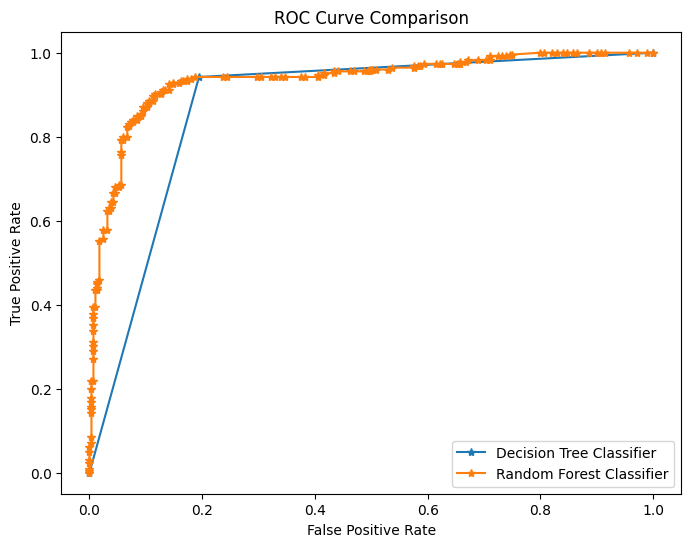

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC AUC scores for different models
aucDTC = roc_auc_score(ytrain, model4.predict_proba(xtrain)[:, 1])
aucRFC = roc_auc_score(ytrain, model6.predict_proba(xtrain)[:, 1])

print("DecisionTreeClassifier AUC =", aucDTC)
print("RandomForestClassifier AUC =", aucRFC)

# Calculate FPR, TPR, and thresholds for ROC curves
fprDTC, tprDTC, _ = roc_curve(ytrain, model4.predict_proba(xtrain)[:, 1])
fprRFC, tprRFC, _ = roc_curve(ytrain, model6.predict_proba(xtrain)[:, 1])

# Plot ROC AUC curves for comparison
plt.figure(figsize=(8, 6))
plt.plot(fprDTC, tprDTC, marker='*', label="Decision Tree Classifier")
plt.plot(fprRFC, tprRFC, marker='*', label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


The provided AUC values indicate the performance of the Decision Tree Classifier and the Random Forest Classifier in distinguishing between positive and negative classes using the Receiver Operating Characteristic (ROC) curves.

* **DecisionTreeClassifier AUC = 0.8739:** This value represents the Area Under the Curve (AUC) for the ROC curve of the Decision Tree Classifier. An AUC of approximately 0.8739 indicates that the Decision Tree model has a good ability to discriminate between positive and negative classes. The higher the AUC, the better the model is at distinguishing between classes.

* **RandomForestClassifier AUC = 0.9352:** The Random Forest Classifier has a higher AUC of approximately 0.9352. This suggests that the Random Forest model outperforms the Decision Tree model in distinguishing between positive and negative classes. The significantly higher AUC value (0.9352) for the Random Forest Classifier indicates that it has a superior ability to differentiate between these classes compared to the Decision Tree Classifier.

In summary, a higher AUC value generally indicates better model performance in terms of its ability to discriminate between classes. Therefore, the Random Forest Classifier, with an AUC of 0.9352, is more effective in this regard compared to the Decision Tree Classifier with an AUC of 0.8739.